In [4]:
import pandas as pd

purchase_data=pd.read_csv('purchase_behaviour.csv')
transaction_data=pd.read_csv('transaction_data.csv')
print("purchase data")
display(purchase_data.head())
print('transaction data')
display(transaction_data.head())

purchase data


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


transaction data


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
top_products = (
    transaction_data.groupby('PROD_NAME')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
print(top_products)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


In [8]:
#above are the top selling products from transaction data 

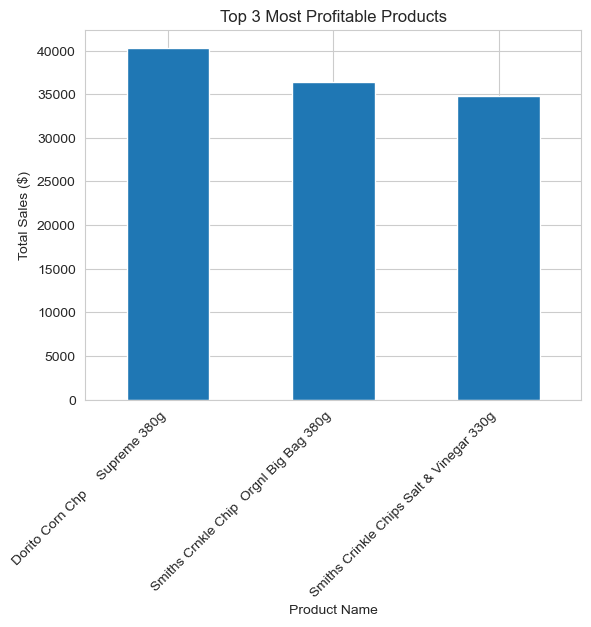

In [20]:
import matplotlib.pyplot as plt

top_products.plot(kind="bar")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha="right")
plt.show()

In [11]:
profitable_customers=(
    transaction_data["LYLTY_CARD_NBR"]
    .value_counts().head(20)
)


In [12]:
profitable_customers_df = purchase_data[purchase_data["LYLTY_CARD_NBR"].isin(profitable_customers.index)]
print(profitable_customers_df)

       LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER
3686            13138         YOUNG FAMILIES       Mainstream
6530            23192         OLDER FAMILIES           Budget
8655            32060         YOUNG FAMILIES           Budget
23189           83180         YOUNG FAMILIES       Mainstream
25958           94185         YOUNG FAMILIES          Premium
28457          104117         OLDER FAMILIES           Budget
28605          105026         YOUNG FAMILIES           Budget
29617          109036  OLDER SINGLES/COUPLES          Premium
30744          113080         OLDER FAMILIES       Mainstream
31654          116181         YOUNG FAMILIES          Premium
34943          128178         OLDER FAMILIES       Mainstream
35061          129050         YOUNG FAMILIES          Premium
40607          152054         OLDER FAMILIES       Mainstream
42813          162039         OLDER FAMILIES       Mainstream
45905          172032  YOUNG SINGLES/COUPLES       Mainstream
47959   

In [13]:
#above are the top 20 profitable customers from the purchase data

In [14]:
profitable_customer_profile = profitable_customers_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="Count")

print("profitable Customer Characteristics:")
display(profitable_customer_profile)

profitable Customer Characteristics:


,LIFESTAGE,PREMIUM_CUSTOMER,Count
0,OLDER FAMILIES,Budget,4
1,OLDER FAMILIES,Mainstream,5
2,OLDER SINGLES/COUPLES,Premium,2
3,YOUNG FAMILIES,Budget,3
4,YOUNG FAMILIES,Mainstream,2
5,YOUNG FAMILIES,Premium,3
6,YOUNG SINGLES/COUPLES,Mainstream,1


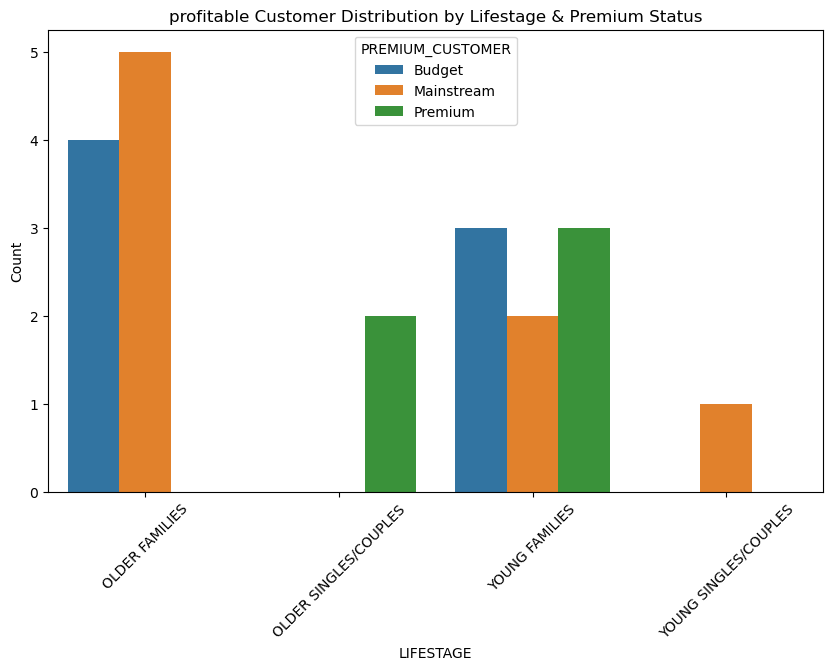

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=profitable_customer_profile,
    x="LIFESTAGE",
    y="Count",
    hue="PREMIUM_CUSTOMER"
)
plt.title("profitable Customer Distribution by Lifestage & Premium Status")
plt.xticks(rotation=45)
plt.show()